In [1]:
import os
import glob
import cv2
import numpy as np
#import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf

ModuleNotFoundError: No module named 'pandas'

: 

In [5]:
def create_generator(latent_dim, output_shape):
    model = keras.Sequential()

    model.add(layers.Input(shape=(latent_dim,)))

    model.add(layers.Dense(256 * 8 * 8, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Reshape((8, 8, 256)))

    model.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(output_shape[-1], (4, 4), strides=(2, 2), padding='same', 
                                     use_bias=False, activation='tanh'))

    return model


latent_dim = 100
output_shape = (64, 64, 3)

generator = create_generator(latent_dim, output_shape)

generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16384)             1638400   
                                                                 
 batch_normalization_1 (Bat  (None, 16384)             65536     
 chNormalization)                                                
                                                                 
 re_lu (ReLU)                (None, 16384)             0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 16, 16, 128)       524288    
 anspose)                                                        
                                                                 
 batch_normalization_2 (Bat  (None, 16, 16, 128)      

In [6]:
latent_dim = 100
output_shape = (64, 64, 3)

generator = create_generator(latent_dim, output_shape)
discriminator = create_discriminator(output_shape)
discriminator.trainable = False

gan_model = keras.Sequential()
gan_model.add(generator)
gan_model.add(discriminator)

gan_model.compile(loss='binary_crossentropy', optimizer='adam')

In [7]:
def create_ela(img):
    cv2.imwrite("temp.jpg", img, [cv2.IMWRITE_JPEG_QUALITY, 95])
    img2 = cv2.imread("temp.jpg")
    cv2.imwrite("temp.jpg", img2, [cv2.IMWRITE_JPEG_QUALITY, 90])
    img2 = cv2.imread("temp.jpg")
    diff = 15 * cv2.absdiff(img, img2)
    return diff

In [17]:
img = cv2.imread('PS-Battles/photoshops/10092l/c69axf4_0.png')

In [18]:
ela = create_ela(img)

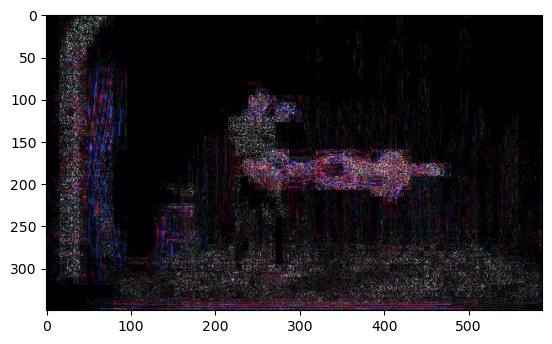

In [19]:
plt.imshow(ela)